In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [3]:
# Load the data
df = pd.read_csv("./Motor vehicle insurance data.csv", sep=";")
print(df.shape)
df.head()

(105555, 30)


,ID,Date_start_contract,Date_last_renewal,Date_next_renewal,Date_birth,Date_driving_licence,Distribution_channel,Seniority,Policies_in_force,Max_policies,...,Area,Second_driver,Year_matriculation,Power,Cylinder_capacity,Value_vehicle,N_doors,Type_fuel,Length,Weight
0,1,05/11/2015,05/11/2015,05/11/2016,15/04/1956,20/03/1976,0,4,1,2,...,0,0,2004,80,599,7068.0,0,P,NaN,190
1,1,05/11/2015,05/11/2016,05/11/2017,15/04/1956,20/03/1976,0,4,1,2,...,0,0,2004,80,599,7068.0,0,P,NaN,190
2,1,05/11/2015,05/11/2017,05/11/2018,15/04/1956,20/03/1976,0,4,2,2,...,0,0,2004,80,599,7068.0,0,P,NaN,190
3,1,05/11/2015,05/11/2018,05/11/2019,15/04/1956,20/03/1976,0,4,2,2,...,0,0,2004,80,599,7068.0,0,P,NaN,190
4,2,26/09/2017,26/09/2017,26/09/2018,15/04/1956,20/03/1976,0,4,2,2,...,0,0,2004,80,599,7068.0,0,P,NaN,190


## EDA

In [4]:
# Check duplicates -> No duplicates
df.drop_duplicates().shape

(105555, 30)

In [5]:
# Check missing values
cols = df.columns
for col in cols:
    num_missing = sum(df[col].isna())
    if num_missing > 0:
        print(f"{col} : {num_missing}")

Date_lapse : 70408
Type_fuel : 1764
Length : 10329


In [6]:
# Convert date columns to datetime
date_columns = [col for col in df.columns if "Date" in col]
for col in date_columns:
    if df[col].dtype == "object":
        df[col] = pd.to_datetime(df[col], format="%d/%m/%Y", errors="coerce")

In [7]:
df.dtypes

ID                               int64
Date_start_contract     datetime64[ns]
Date_last_renewal       datetime64[ns]
Date_next_renewal       datetime64[ns]
Date_birth              datetime64[ns]
Date_driving_licence    datetime64[ns]
Distribution_channel             int64
Seniority                        int64
Policies_in_force                int64
Max_policies                     int64
Max_products                     int64
Lapse                            int64
Date_lapse              datetime64[ns]
Payment                          int64
Premium                        float64
Cost_claims_year               float64
N_claims_year                    int64
N_claims_history                 int64
R_Claims_history               float64
Type_risk                        int64
Area                             int64
Second_driver                    int64
Year_matriculation               int64
Power                            int64
Cylinder_capacity                int64
Value_vehicle            

### EDA on Policy and customer characteristics

In [8]:
features = [
    "Date_start_contract",
    "Date_last_renewal",
    "Date_next_renewal",
    "Distribution_channel",
    "Date_birth",
    "Date_driving_licence",
    "Seniority",
    "Policies_in_force",
    "Max_policies",
    "Max_products",
    "Lapse",
    "Payment",
    "Age",
    "yoe",
    "contract_duration",
]
date_cols = [
    "Date_start_contract",
    "Date_last_renewal",
    "Date_next_renewal",
    "Date_birth",
    "Date_driving_licence",
]
num_cols = [
    "Seniority",
    "Policies_in_force",
    "Max_policies",
    "Max_products",
    "Lapse",
    "Age",
    "yoe",
    "contract_duration",
]
cat_cols = [
    "Distribution_channel",
    "Payment",
]

In [9]:
# Change a data type of categorical features
df[cat_cols] = df[cat_cols].astype(object)

In [10]:
# Create age features
df["Age"] = (df["Date_next_renewal"] - df["Date_birth"]).dt.days // 365
df["yoe"] = (df["Date_next_renewal"] - df["Date_driving_licence"]).dt.days // 365
df["contract_duration"] = (
    df["Date_last_renewal"] - df["Date_start_contract"]
).dt.days // 365

In [11]:
# Summary statistics
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Seniority,105555.0,6.696604,6.263911,1.0,3.0,4.0,9.0,40.0
Policies_in_force,105555.0,1.455649,0.928427,1.0,1.0,1.0,2.0,17.0
Max_policies,105555.0,1.837232,1.155536,1.0,1.0,2.0,2.0,17.0
Max_products,105555.0,1.065842,0.267807,1.0,1.0,1.0,1.0,4.0
Lapse,105555.0,0.221837,0.464858,0.0,0.0,0.0,0.0,7.0
Age,105555.0,47.860869,12.847760,19.0,38.0,47.0,57.0,99.0
yoe,105555.0,25.294823,12.485150,-2.0,15.0,24.0,35.0,75.0
contract_duration,105555.0,2.954232,3.905830,-1.0,0.0,1.0,4.0,38.0


In [12]:
df[cat_cols].describe(include=["O"])

,Distribution_channel,Payment
count,105555,105555
unique,2,2
top,0,0
freq,57917,71864


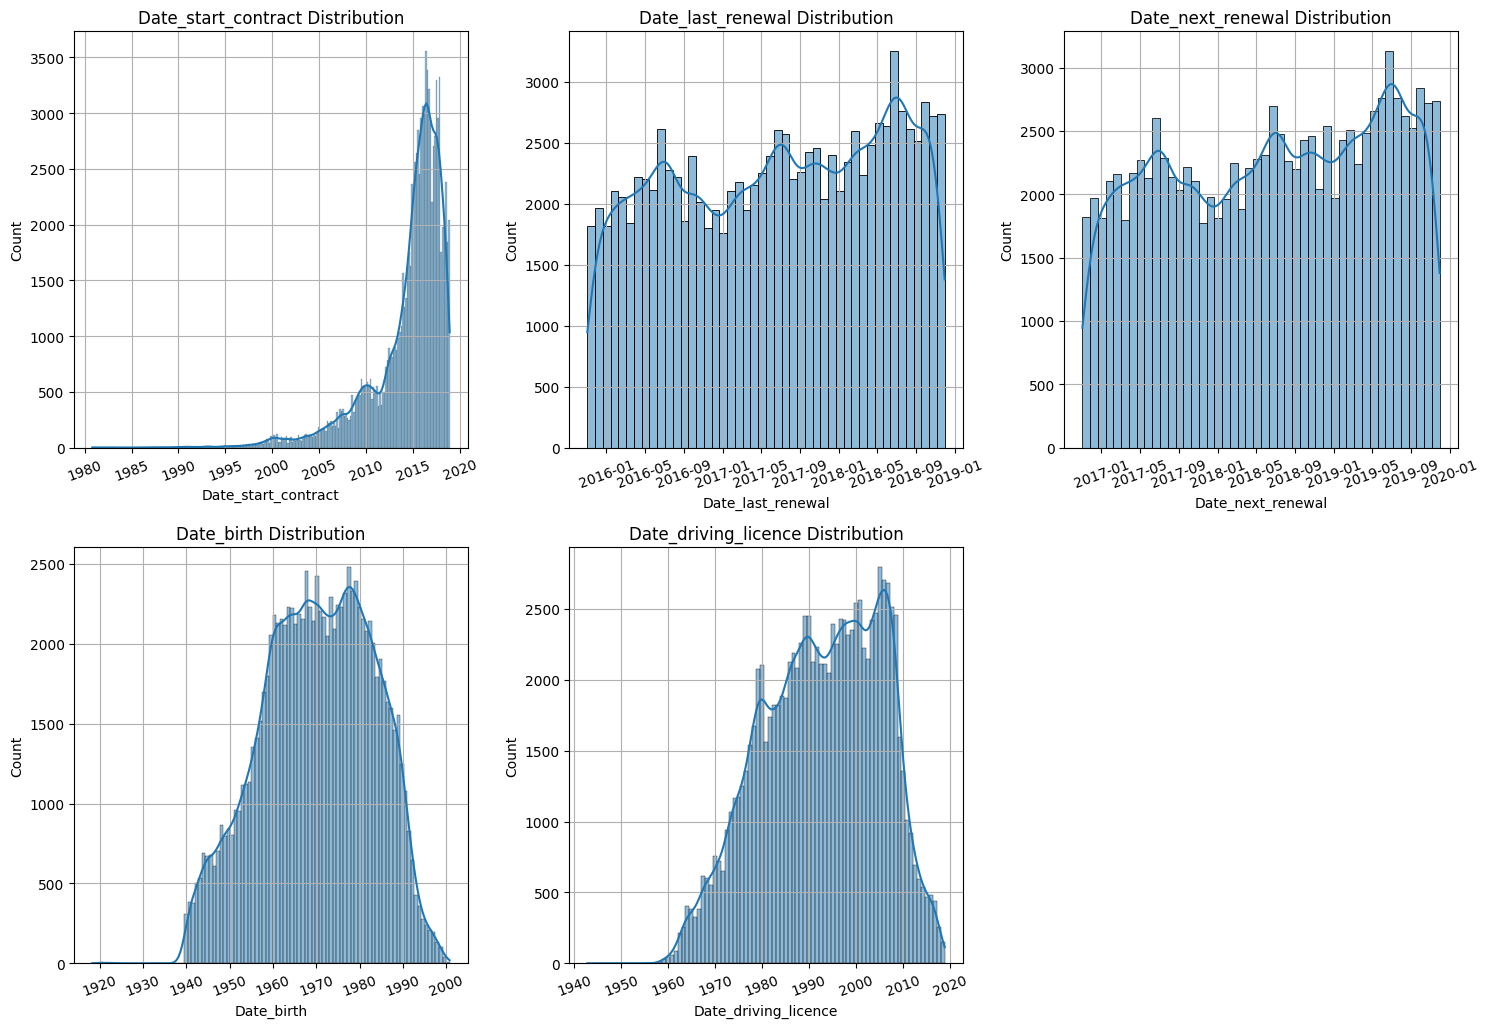

In [13]:
# plot the histogram for date columns
plt.figure(figsize=(15, 15))
for i, feature in enumerate(date_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} Distribution")
    plt.grid(True)
    plt.xticks(rotation=20)
    plt.tight_layout(pad=2.0)

plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.tight_layout()
plt.show()

In terms of our research questions, converting raw date columns to numerical values can be more beneficial for analysis and modeling. Therefore, we created the following derived features:

- `Age` = (`Date_next_renewal` - `Date_birth`) // 365
- `yoe (year of driving experience)` = (`Date_next_renewal` - `Date_driving_licence`) // 365
- `contract_duration` = (`Date_last_renewal` - `Date_start_contract`) //365

Note that integer division by 365 is an approximation;

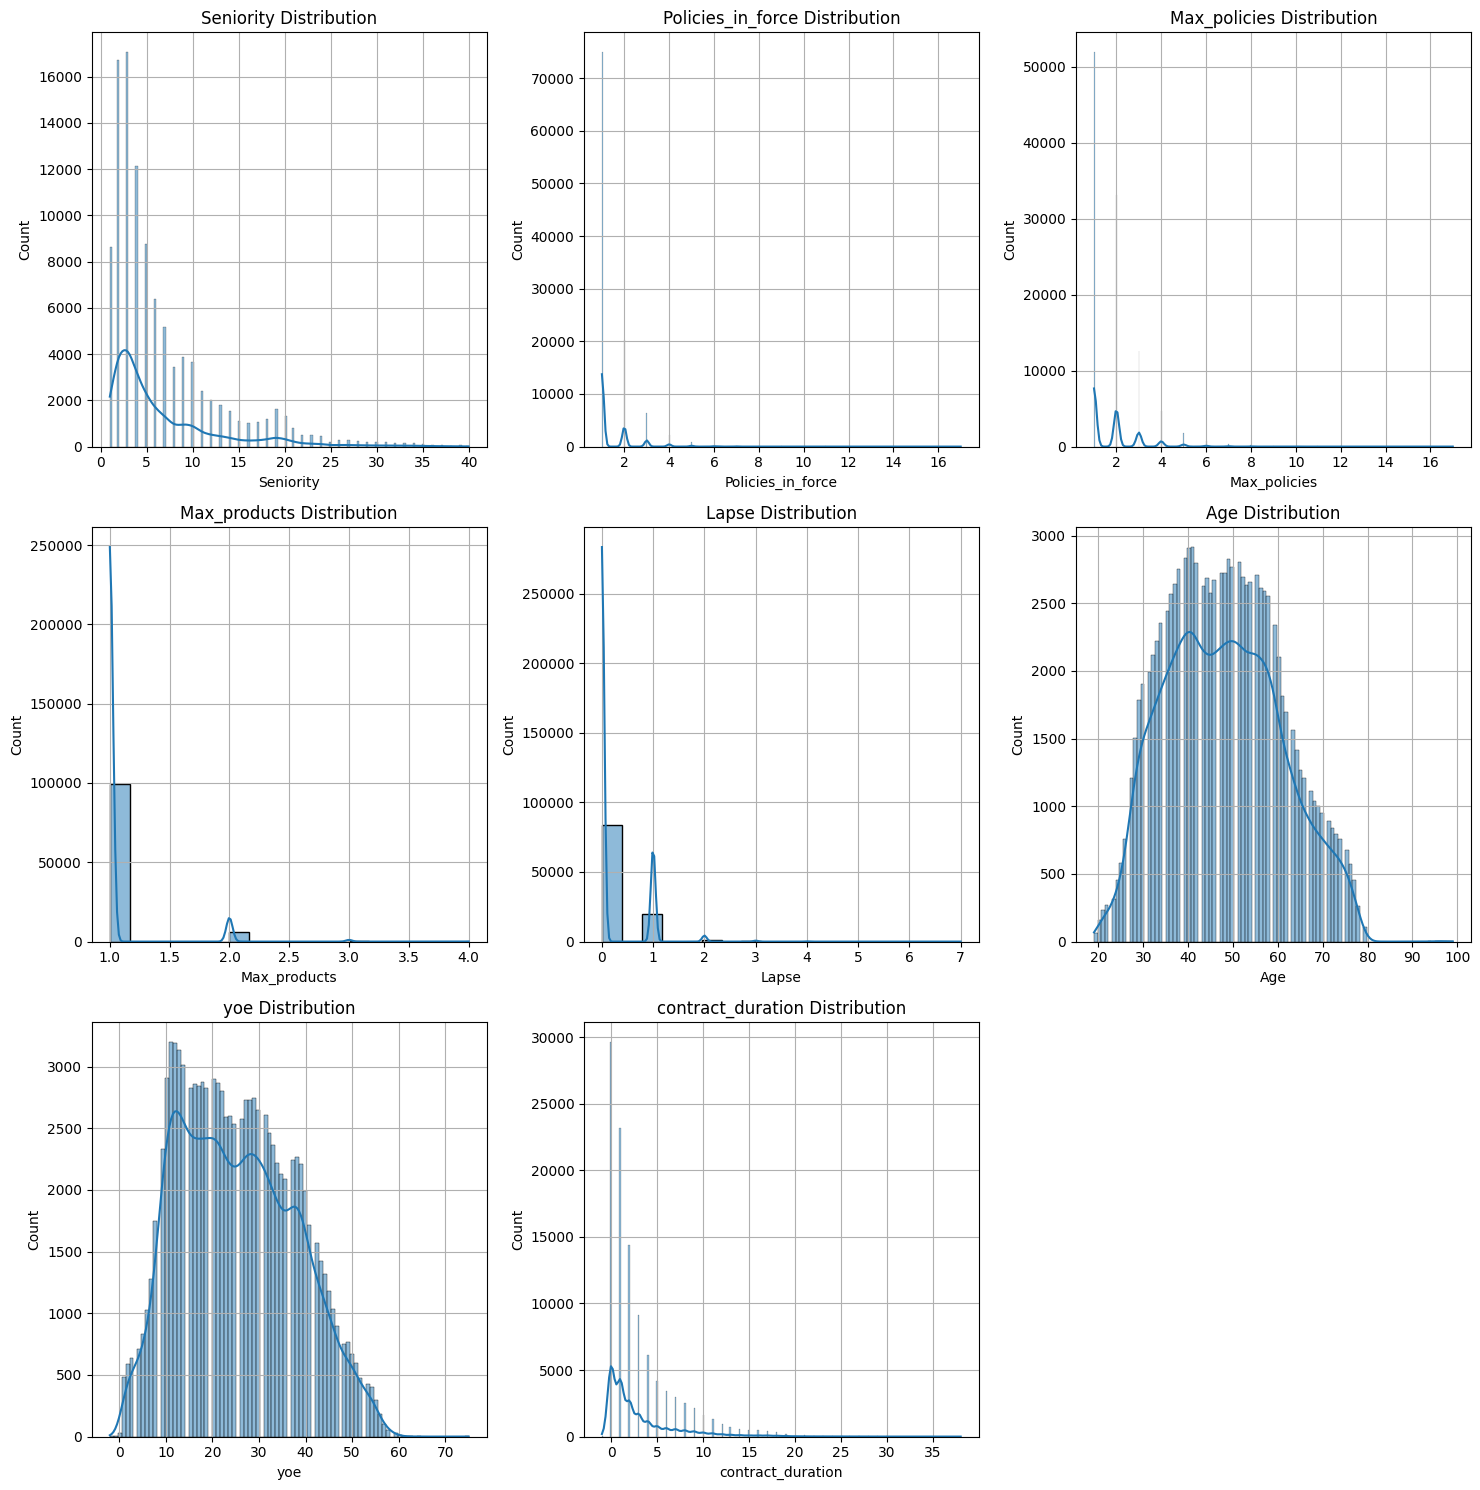

In [14]:
# numerical features
plt.figure(figsize=(15, 15))
for i, feature in enumerate(num_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} Distribution")
    plt.grid(True)
    plt.tight_layout(pad=2.0)

plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.tight_layout()
plt.show()

- Seniority: The shape of distribution is right-skewed, indicating a large portion of policyholders have relatively low seniority,  while a smaller group has been with the company for many years.

- Policies_in_force, Max_policies, Max_products: Most customers have just 1–2 policies in force, with fewer holding a higher number of policies.
- Laps: The majority of policyholders have never lapsed.
- Age: Roughly balanced and bell-shaped distribution.
- yoe (year of driving experience) : The peak is around 10-20 years.
- contract_duration : right-skewed, suggesting that most customers have relatively short contract durations

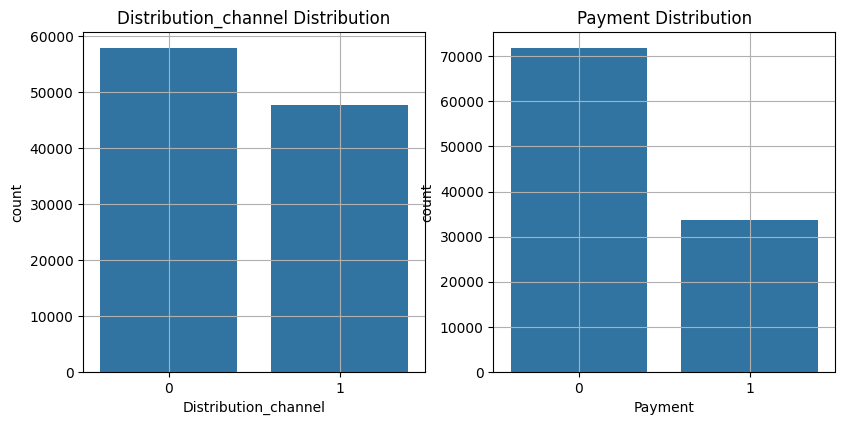

In [15]:
# categorical features
plt.figure(figsize=(15, 15))
for i, feature in enumerate(cat_cols):
    plt.subplot(3, 3, i + 1)

    sns.countplot(x=df[feature], order=df[feature].value_counts().index)
    plt.title(f"{feature} Distribution")
    plt.grid(True)

- Distribution_channel :  the frequency of 0 (for Agent) is higher than 1 (for Insurance brokers).
- Payment : the frequency of 0 (for an annual payment method) is higher than 1 (for a half-yearly administrative process).

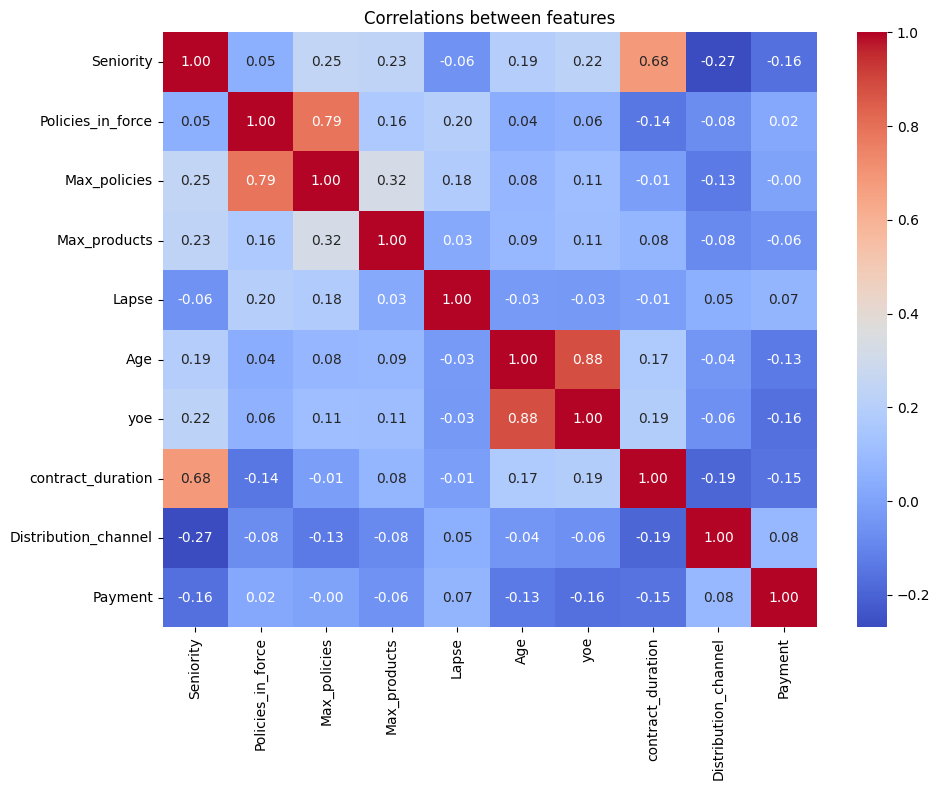

In [16]:
# Correlation
plt.figure(figsize=(10, 8))
correlation_matrix = df[num_cols + cat_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlations between features")
plt.tight_layout()

We can find strong correlation between below features
- Seniority & Contract_Durtaion(0.68) : Customers with higher seniority (time with the company) tend to have longer contract durations.
- Policies_in_force & Max_policies (0.79) : Customers who currently hold more policies also tend to have had higher policy counts historically.
- Age & yoe (0.88) : Older customers tend to have more driving experience.


In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"] = num_cols
vif_data["VIF"] = [
    variance_inflation_factor(df[num_cols].values, i)
    for i in range(df[num_cols].shape[1])
]

# 6. Display the VIF results
print("Variance Inflation Factor (VIF) Results:")
print(vif_data)

Variance Inflation Factor (VIF) Results:
             Feature        VIF
0          Seniority   4.843232
1  Policies_in_force   9.717251
2       Max_policies  11.497471
3       Max_products  12.744049
4              Lapse   1.302354
5                Age  36.580215
6                yoe  18.224115
7  contract_duration   3.189190


In [18]:
num_temp = [
    "Seniority",
    "Policies_in_force",
    # "Max_policies",
    "Max_products",
    "Lapse",
    # "Age",
    "yoe",
    "contract_duration",
]
vif_data = pd.DataFrame()
vif_data["Feature"] = num_temp
vif_data["VIF"] = [
    variance_inflation_factor(df[num_temp].values, i)
    for i in range(df[num_temp].shape[1])
]

# 6. Display the VIF results
print("Variance Inflation Factor (VIF) Results:")
print(vif_data)

Variance Inflation Factor (VIF) Results:
             Feature       VIF
0          Seniority  4.412464
1  Policies_in_force  3.775476
2       Max_products  6.881485
3              Lapse  1.294095
4                yoe  4.816539
5  contract_duration  3.120336


<Figure size 1200x1200 with 0 Axes>

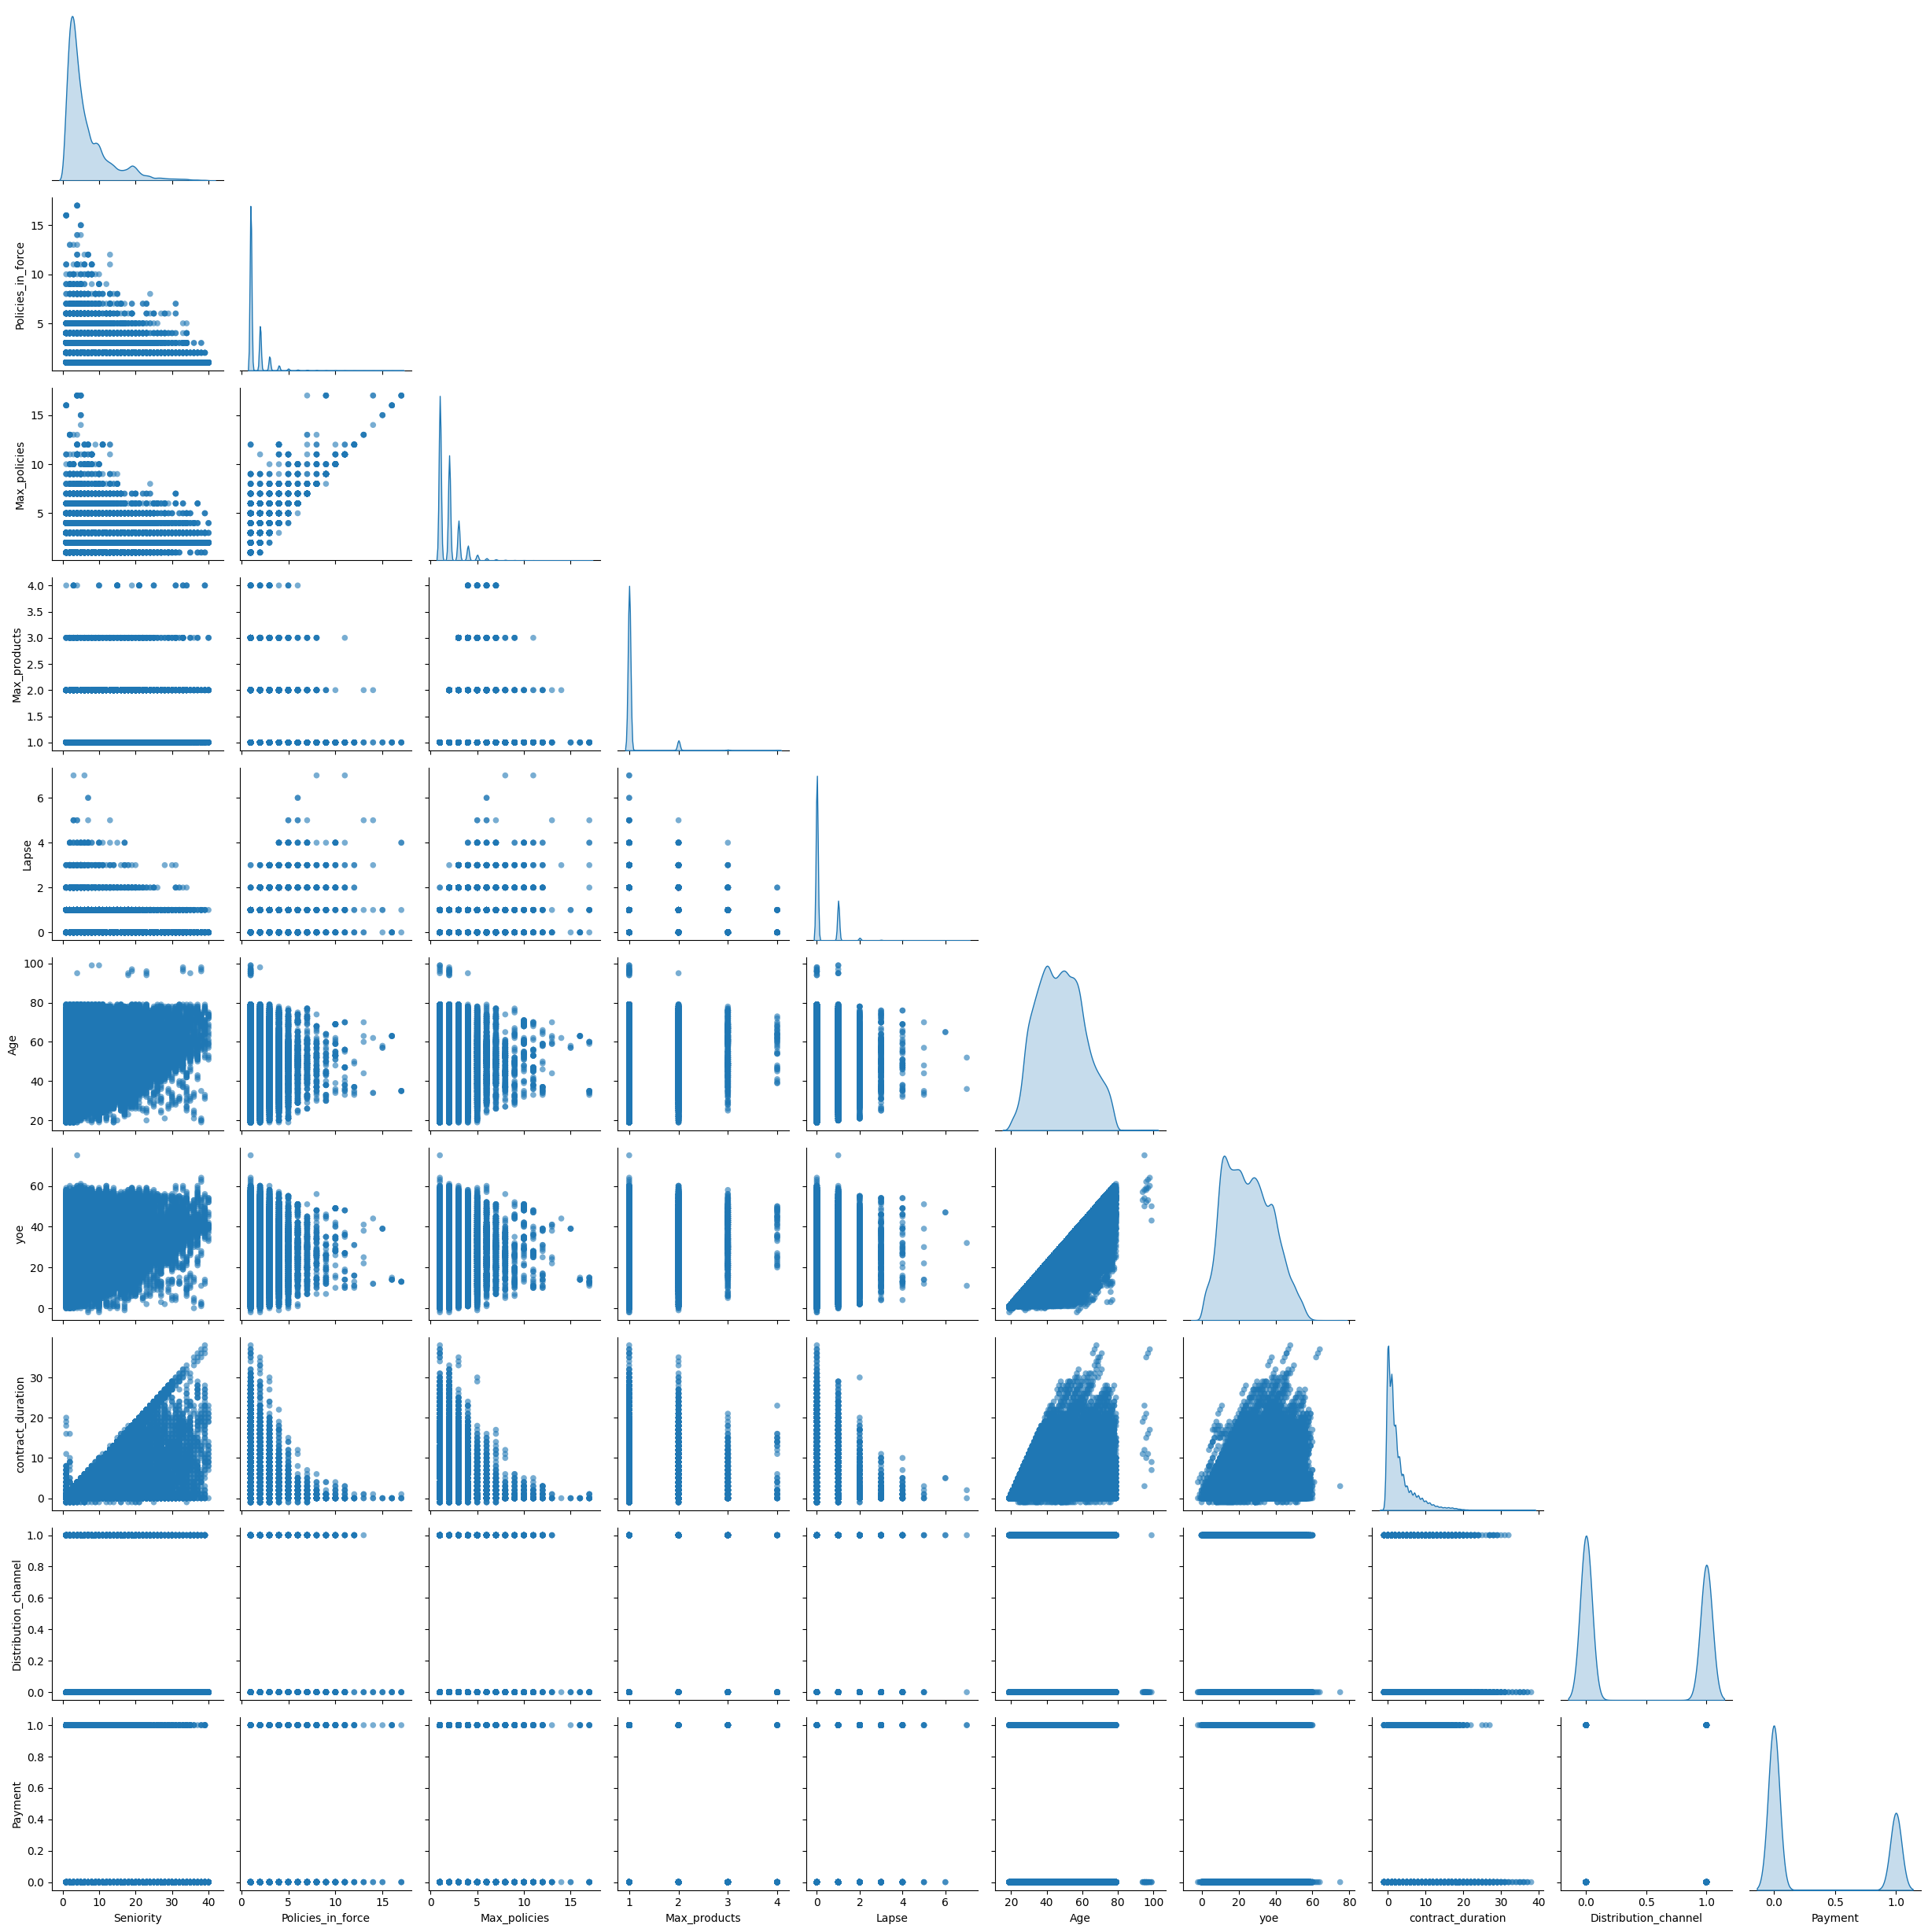

In [19]:
# Scatter plot
plt.figure(figsize=(12, 12))
scatter_matrix = sns.pairplot(
    df[num_cols + cat_cols],
    diag_kind="kde",
    plot_kws={"alpha": 0.6, "s": 30, "edgecolor": "none"},
    corner=True,
)

scatter_matrix.tight_layout()
plt.subplots_adjust(wspace=0.1, hspace=0.1)

plt.show()

### Relationship with Lapse

In [20]:
df["Is_lapse"] = np.where(df["Lapse"] > 0, 1, 0)

In [21]:
eda_columns = [
    "Distribution_channel",
    "Seniority",
    "Policies_in_force",
    "Max_products",
    "Payment",
    "Premium",
    "Cost_claims_year",
    "N_claims_year",
    "N_claims_history",
    "R_Claims_history",
    "Type_risk",
    "Area",
    "Second_driver",
    "Value_vehicle",
    "N_doors",
    "Type_fuel",
    "yoe",
    "contract_duration",
    "Is_lapse",
]
numeric_cols = [
    "Seniority",
    "Policies_in_force",
    "Max_products",
    "Premium",
    "Cost_claims_year",
    "N_claims_year",
    "N_claims_history",
    "R_Claims_history",
    "Value_vehicle",
    "N_doors",
    "yoe",
    "contract_duration",
    "Is_lapse",
]
categorical_cols = [
    "Distribution_channel",
    "Payment",
    "Type_risk",
    "Area",
    "Second_driver",
    "Type_fuel",
]
dependent_cols = ["Is_lapse"]

In [22]:
df_eda = df[eda_columns]

In [23]:
df_eda[numeric_cols].corr()

,Seniority,Policies_in_force,Max_products,Premium,Cost_claims_year,N_claims_year,N_claims_history,R_Claims_history,Value_vehicle,N_doors,yoe,contract_duration,Is_lapse
Seniority,1.000000,0.048138,0.232416,-0.069821,-0.022437,-0.043957,0.430183,-0.097347,-0.030892,-0.034382,0.223874,0.681207,-0.064833
Policies_in_force,0.048138,1.000000,0.162403,-0.092465,0.014295,0.176735,0.233066,0.087487,0.021039,-0.107895,0.060539,-0.140910,0.115837
Max_products,0.232416,0.162403,1.000000,-0.090041,-0.005411,-0.000132,0.167000,-0.020508,-0.075031,-0.176379,0.106978,0.075999,0.014326
Premium,-0.069821,-0.092465,-0.090041,1.000000,0.053662,0.092688,0.117130,0.174721,0.415204,0.341438,-0.114351,-0.066503,0.065696
Cost_claims_year,-0.022437,0.014295,-0.005411,0.053662,1.000000,0.199022,0.068658,0.169467,0.028801,0.017452,-0.026463,-0.036780,-0.012668
N_claims_year,-0.043957,0.176735,-0.000132,0.092688,0.199022,1.000000,0.392514,0.565950,0.068106,0.050852,-0.051157,-0.112975,-0.040177
N_claims_history,0.430183,0.233066,0.167000,0.117130,0.068658,0.392514,1.000000,0.387687,0.081700,0.060078,0.060769,0.202186,0.062387
R_Claims_history,-0.097347,0.087487,-0.020508,0.174721,0.169467,0.565950,0.387687,1.000000,0.088127,0.085392,-0.087712,-0.114154,0.119557
Value_vehicle,-0.030892,0.021039,-0.075031,0.415204,0.028801,0.068106,0.081700,0.088127,1.000000,0.320980,0.016377,-0.060767,-0.010847
N_doors,-0.034382,-0.107895,-0.176379,0.341438,0.017452,0.050852,0.060078,0.085392,0.320980,1.000000,-0.030833,-0.036673,-0.023632


In [24]:
# Change a data type of categorical features
df_eda[categorical_cols] = df_eda[categorical_cols].astype(object)
df_eda[dependent_cols] = df_eda[dependent_cols].astype(object)

In [25]:
for target_col in dependent_cols:
    print(f"\n{'='*50}")
    print(f"Analysis: {target_col}")
    print(f"{'='*50}")

    target_counts = df[target_col].value_counts()
    for value, count in target_counts.items():
        print(f"  {value}: {count} ({count/len(df)*100:.2f}%)")


Analysis: Is_lapse
  0: 84007 (79.59%)
  1: 21548 (20.41%)


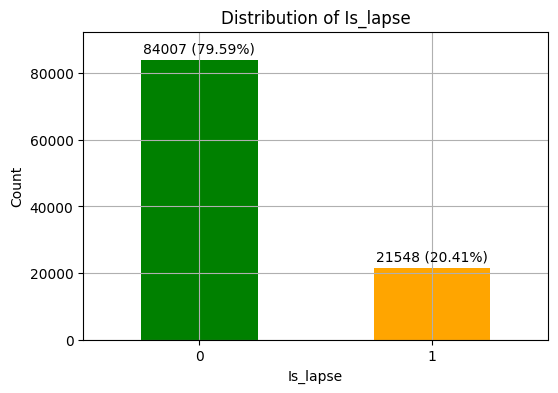

In [24]:
import matplotlib.pyplot as plt

# Calculate frequency counts
counts = df["Is_lapse"].value_counts()

# Create the bar plot
ax = counts.plot(kind="bar", figsize=(6, 4), color=["green", "orange"])
plt.title("Distribution of Is_lapse")
plt.xlabel("Is_lapse")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid()

# Compute total number of observations
total = counts.sum()

# Annotate bars with frequency and percentage
for i, v in enumerate(counts):
    pct = v / total * 100
    # Adjust the vertical position (y-coordinate) to prevent overlap with the bar
    plt.text(
        i,  # x position
        v + 0.02 * total,  # y position (slightly above the bar)
        f"{v} ({pct:.2f}%)",
        ha="center",
    )

# Adjust the y-limit so annotations are clearly visible
plt.ylim(top=max(counts) * 1.1)
plt.show()

In [26]:
import pandas as pd
from scipy.stats import chi2_contingency

dep_var = "Is_lapse"
for cat_col in categorical_cols:
    # Create a contingency table of cat_col vs Is_lapse
    contingency_table = pd.crosstab(df[cat_col], df[dep_var])

    # Perform chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print(f"=== Chi-Square Test: {cat_col} vs {dep_var} ===")
    print(f"Chi2 statistic: {chi2:.4f}")
    print(f"p-value: {p:.4f}")
    print(f"Degrees of freedom: {dof}")
    print("Expected frequencies:")
    print(expected)
    print("-" * 40)

=== Chi-Square Test: Distribution_channel vs Is_lapse ===
Chi2 statistic: 375.4390
p-value: 0.0000
Degrees of freedom: 1
Expected frequencies:
[[46093.82235801 11823.17764199]
 [37913.17764199  9724.82235801]]
----------------------------------------


=== Chi-Square Test: Payment vs Is_lapse ===
Chi2 statistic: 501.3147
p-value: 0.0000
Degrees of freedom: 1
Expected frequencies:
[[57193.68147411 14670.31852589]
 [26813.31852589  6877.68147411]]
----------------------------------------
=== Chi-Square Test: Type_risk vs Is_lapse ===
Chi2 statistic: 21.3220
p-value: 0.0001
Degrees of freedom: 3
Expected frequencies:
[[ 6766.40153474  1735.59846526]
 [10514.90203212  2697.09796788]
 [66048.41959168 16941.58040832]
 [  677.27684146   173.72315854]]
----------------------------------------
=== Chi-Square Test: Area vs Is_lapse ===
Chi2 statistic: 136.6203
p-value: 0.0000
Degrees of freedom: 1
Expected frequencies:
[[60997.89216996 15646.10783004]
 [23009.10783004  5901.89216996]]
----------------------------------------
=== Chi-Square Test: Second_driver vs Is_lapse ===
Chi2 statistic: 35.8500
p-value: 0.0000
Degrees of freedom: 1
Expected frequencies:
[[73614.66040453 18882.33959547]
 [10392.33959547  2665.66040453]]
--------------------


=== Distribution_channel vs Is_lapse ===
Count:
 Is_lapse                  0      1
Distribution_channel              
0                     47357  10560
1                     36650  10988

Ratio (%):
 Is_lapse                      0          1
Distribution_channel                      
0                     81.767011  18.232989
1                     76.934380  23.065620

=== Payment vs Is_lapse ===
Count:
 Is_lapse      0      1
Payment               
0         58561  13303
1         25446   8245

Ratio (%):
 Is_lapse          0          1
Payment                       
0         81.488645  18.511355
1         75.527589  24.472411

=== Type_risk vs Is_lapse ===
Count:
 Is_lapse       0      1
Type_risk              
1           6698   1804
2          10510   2702
3          66072  16918
4            727    124

Ratio (%):
 Is_lapse           0          1
Type_risk                      
1          78.781463  21.218537
2          79.548895  20.451105
3          79.614411  20.385589
4  

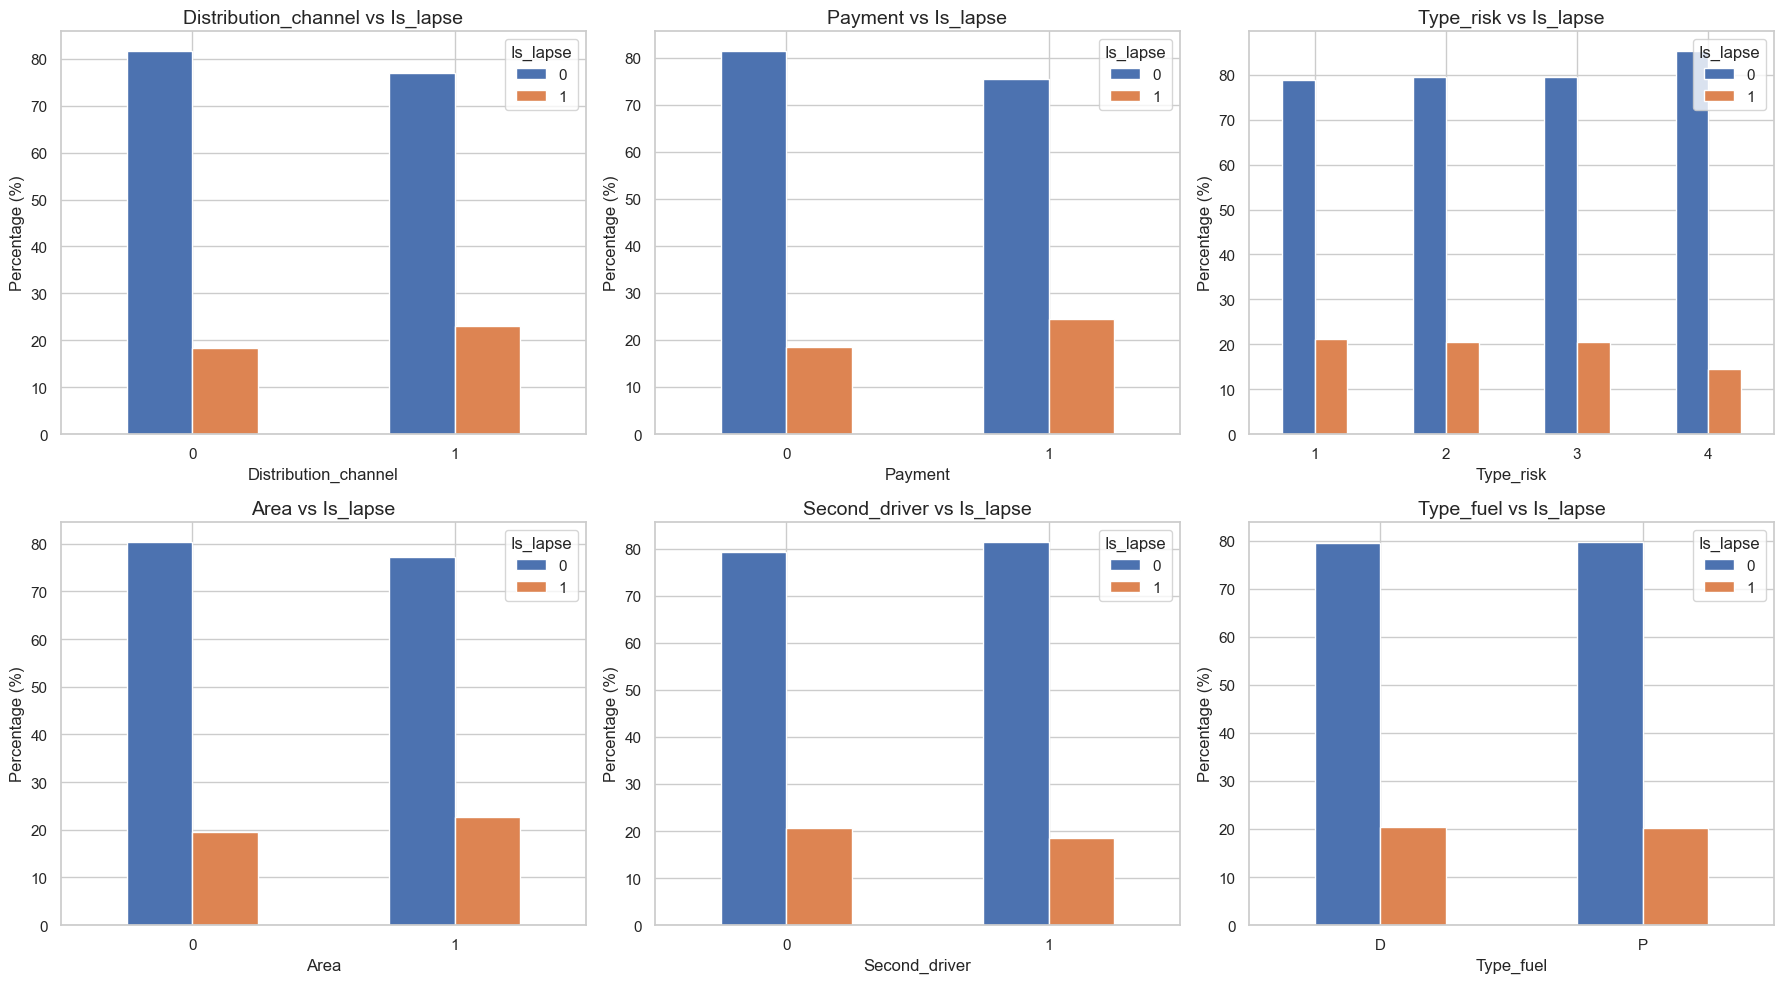

In [27]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")
sns.set(style="whitegrid")

n_cols = 3
n_rows = math.ceil(len(categorical_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 5 * n_rows))
axes = axes.flatten()

for i, cat_col in enumerate(categorical_cols):
    cross_tab_prop = pd.crosstab(df[cat_col], df[target_col], normalize="index") * 100

    cross_tab_prop.plot(kind="bar", stacked=False, ax=axes[i])

    axes[i].set_title(f"{cat_col} vs {target_col}", fontsize=14)
    axes[i].set_xlabel(cat_col, fontsize=12)
    axes[i].set_ylabel("Percentage (%)", fontsize=12)
    axes[i].legend(title=target_col)
    axes[i].tick_params(axis="x", rotation=0)

    print(f"\n=== {cat_col} vs {target_col} ===")
    cross_tab_count = pd.crosstab(df[cat_col], df[target_col])
    print("Count:\n", cross_tab_count)
    print("\nRatio (%):\n", cross_tab_prop)

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

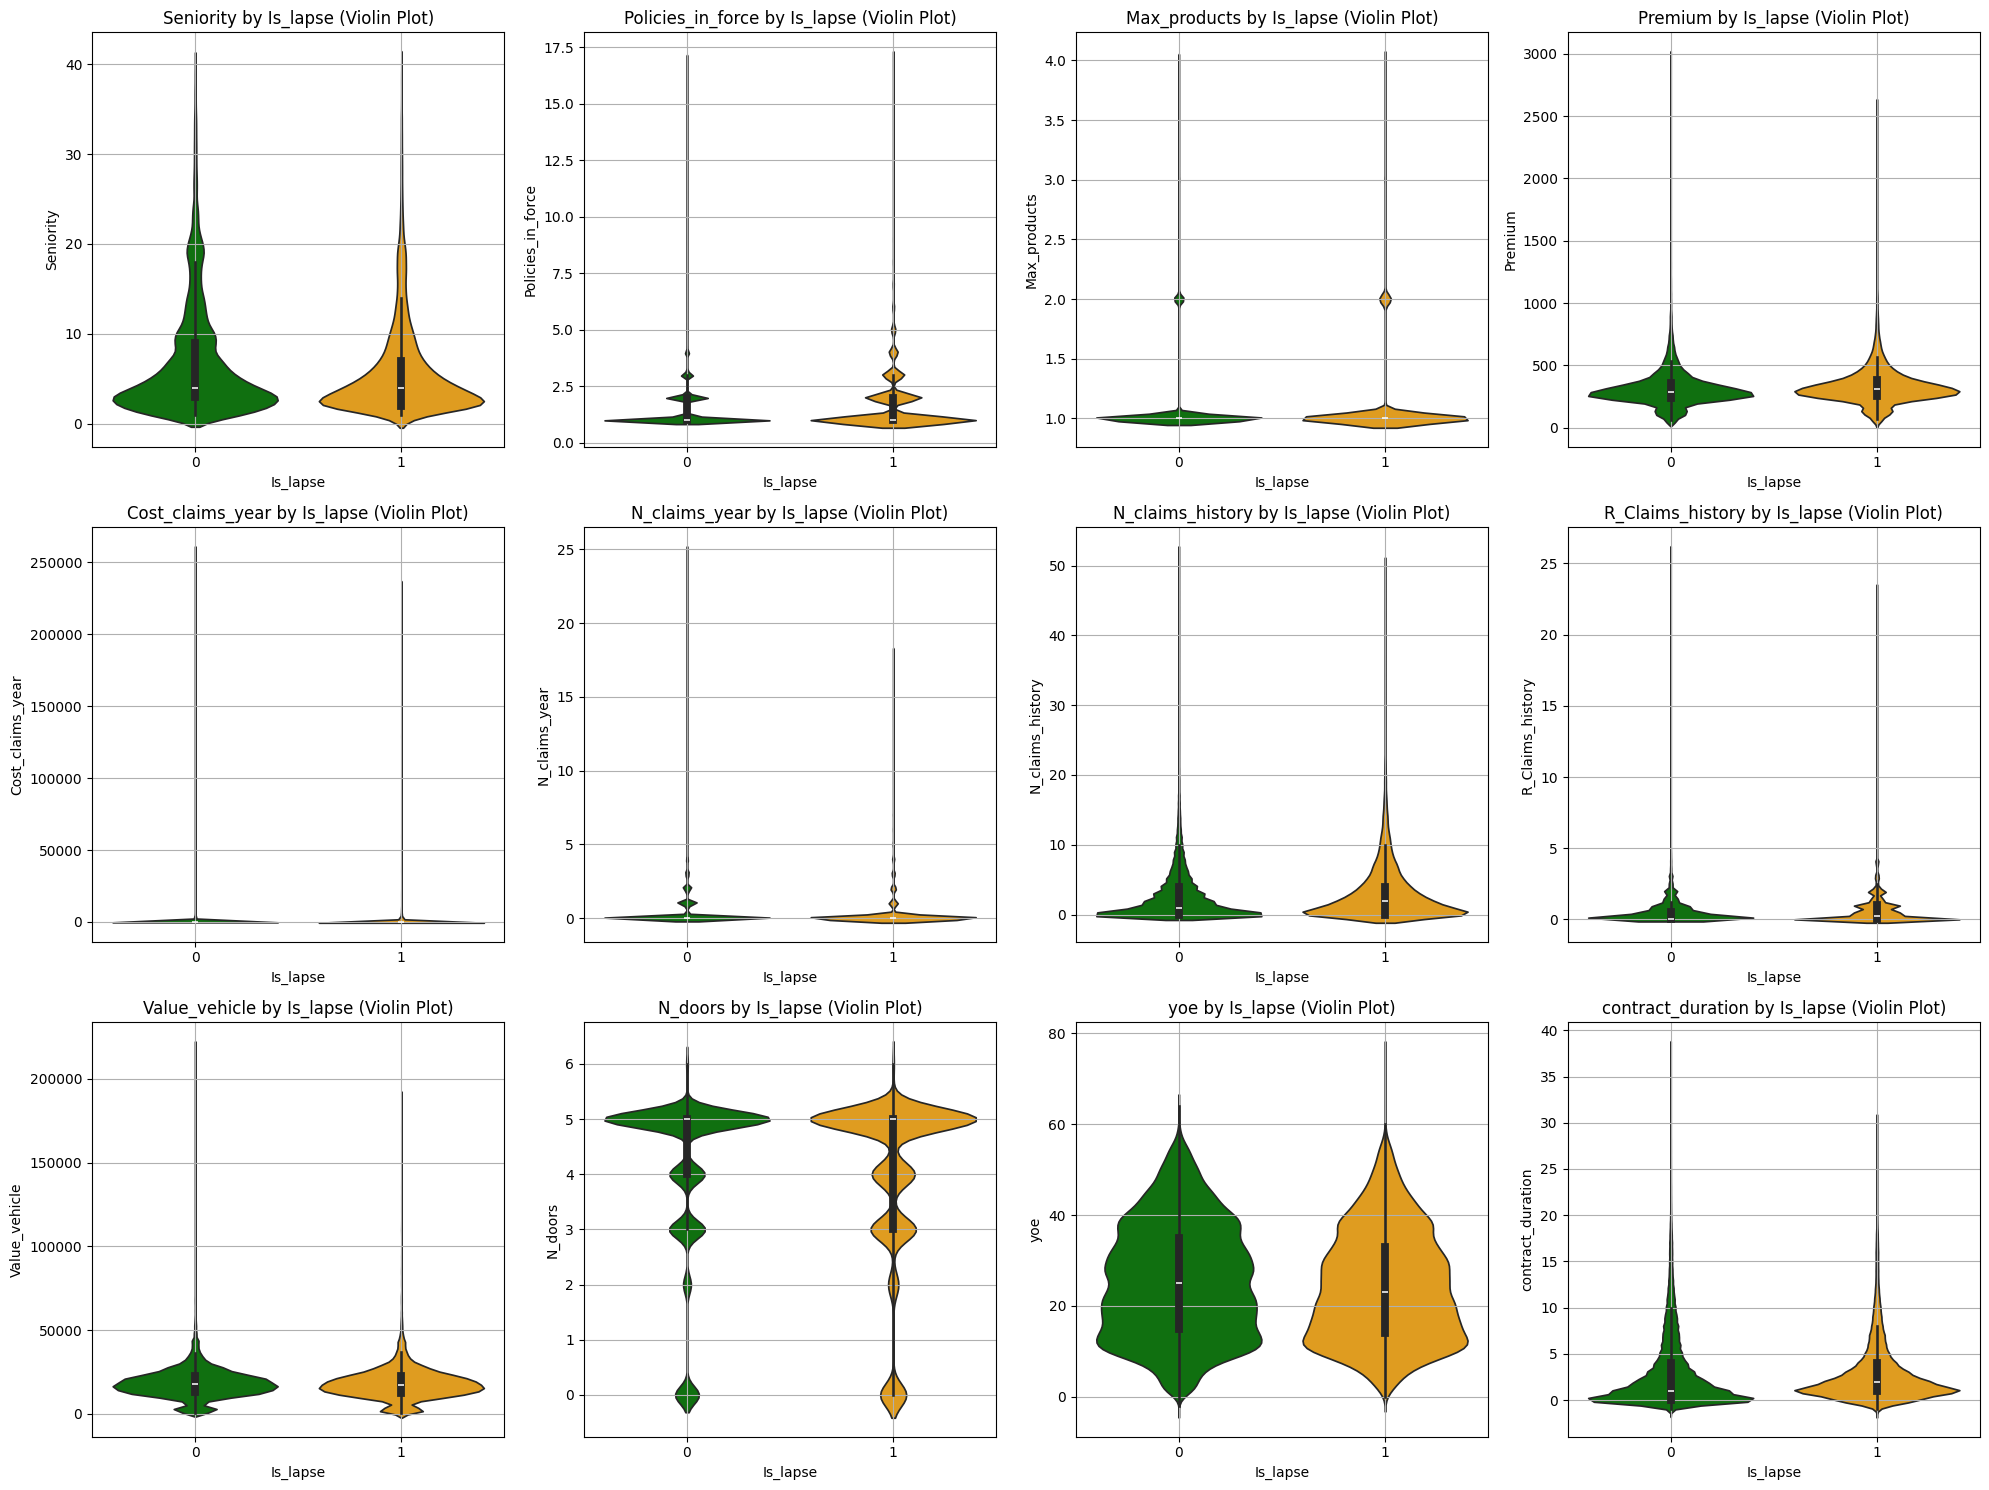

In [ ]:
import math

n_cols = 4
n_rows = math.ceil(len(numeric_cols) / n_cols)

plt.figure(figsize=(5 * n_cols, 5 * n_rows))
dep_var = "Is_lapse"
for i, num_var in enumerate(numeric_cols):
    # Create subplot in a grid of (n_rows x n_cols)
    plt.subplot(n_rows, n_cols, i + 1)
    sns.violinplot(x=dep_var, y=num_var, data=df, palette={"0": "green", "1": "orange"})
    plt.title(f"{num_var} by {dep_var} (Violin Plot)")
    plt.grid()

plt.tight_layout()
plt.show()